In [1]:
from quantum_dataset import QM7, QM7b, QM9, Champs, SuperSet
from quantum_learning import Learn, Selector, ChampSelector
from quantum_model import FFNet
from torch.optim import Adam
from torch.nn import MSELoss, L1Loss

<class 'quantum_dataset.QM7'> dataset created...
epoch: 0 of 200, train loss: 1516.3306718306108, val loss: 1458.334716796875
epoch: 20 of 200, train loss: 103.70494044910778, val loss: 163.46993255615234
epoch: 40 of 200, train loss: 67.37528957020153, val loss: 94.52006912231445
epoch: 60 of 200, train loss: 95.12262118946423, val loss: 56.242759704589844
epoch: 80 of 200, train loss: 63.17427305741744, val loss: 59.33139991760254
epoch: 100 of 200, train loss: 53.62568213722923, val loss: 53.302696228027344
epoch: 120 of 200, train loss: 48.6274379383434, val loss: 48.75278282165527
epoch: 140 of 200, train loss: 46.89813440496271, val loss: 44.9468994140625
epoch: 160 of 200, train loss: 44.20646598122337, val loss: 44.238075256347656
epoch: 180 of 200, train loss: 41.10967202620073, val loss: 49.5102424621582
test loss: 40.42679977416992
y_pred:
tensor([[-1358.9528],
        [-1133.0763],
        [-1476.4744],
        [-1472.2896],
        [-1616.1979],
        [-1493.7736],
     

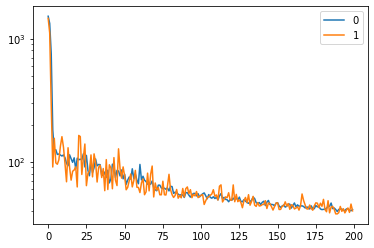

learning time: 0:03:10.087993


In [3]:
opt_params = {'lr': 0.001}
model_params = {'D_in': 23*23, 
                'H': 4096, 
                'D_out': 1, 
                'model_name': 'funnel'}
ds_params = {}
crit_params = {'reduction': 'sum'}

Learn(Dataset=QM7, Model=FFNet, Sampler=Selector, Optimizer=Adam, Criterion=L1Loss, 
      batch_size=256, epochs=200, opt_params=opt_params, model_params=model_params, 
      ds_params=ds_params, crit_params=crit_params, save_model=False, load_model=False)

<class 'quantum_dataset.QM7'> dataset created...
epoch: 0 of 200, train loss: 1261.5641978870738, val loss: 582.2107849121094
epoch: 20 of 200, train loss: 78.74479241804643, val loss: 59.2601318359375
epoch: 40 of 200, train loss: 101.1001182902943, val loss: 70.87662124633789
epoch: 60 of 200, train loss: 63.786527113481, val loss: 65.72017478942871
epoch: 80 of 200, train loss: 51.348710320212625, val loss: 74.87796783447266
epoch: 100 of 200, train loss: 51.413054032759234, val loss: 47.17213249206543
epoch: 120 of 200, train loss: 47.15773426402699, val loss: 47.66024398803711
epoch: 140 of 200, train loss: 43.76442250338468, val loss: 43.0205192565918
epoch: 160 of 200, train loss: 43.09982750632546, val loss: 46.77484893798828
epoch: 180 of 200, train loss: 42.60346707430753, val loss: 40.82026290893555
test loss: 42.868425369262695
y_pred:
tensor([[-1550.8723],
        [-1508.8247],
        [-1616.6088],
        [-1501.9908],
        [-1622.5420],
        [-1616.6287],
        

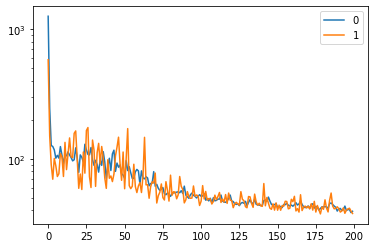

learning time: 0:03:42.278016


In [2]:
opt_params = {'lr': 0.001}
model_params = {'D_in': 23*23, 
                'H': 4096, 
                'D_out': 1, 
                'model_name': 'simple'}
ds_params = {}
crit_params = {'reduction': 'sum'}

Learn(Dataset=QM7, Model=FFNet, Sampler=Selector, Optimizer=Adam, Criterion=L1Loss, 
      batch_size=256, epochs=200, opt_params=opt_params, model_params=model_params, 
      ds_params=ds_params, crit_params=crit_params, save_model=False, load_model=False)

<class 'quantum_dataset.QM7b'> dataset created...
epoch: 0 of 100, train loss: 1541.599970037287, val loss: 1470.2984619140625
epoch: 10 of 100, train loss: 133.04375145652077, val loss: 99.85520553588867
epoch: 20 of 100, train loss: 114.79174215143377, val loss: 104.8345947265625
epoch: 30 of 100, train loss: 90.51977816495028, val loss: 92.69986724853516
epoch: 40 of 100, train loss: 84.68482242931019, val loss: 92.67827606201172
epoch: 50 of 100, train loss: 77.91992690346457, val loss: 66.53000259399414
epoch: 60 of 100, train loss: 76.10332419655539, val loss: 89.03322982788086
epoch: 70 of 100, train loss: 65.84765867753462, val loss: 68.5474739074707
epoch: 80 of 100, train loss: 64.51864450628108, val loss: 59.013864517211914
epoch: 90 of 100, train loss: 60.766930146650836, val loss: 75.59764862060547
test loss: 57.08839225769043
y_pred:
tensor([[-1744.0509],
        [-1701.8939],
        [-1580.9240],
        [-1891.1315],
        [-1380.2852],
        [-1691.5548],
        

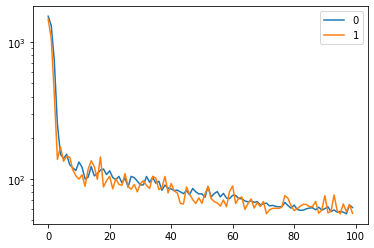

learning time: 0:02:34.352778


In [3]:
opt_params = {'lr': 0.001}
model_params = {'D_in': 23*23+13, 
                'H': 4096, 
                'D_out': 1, 
                'model_name': 'funnel'}
ds_params = {'target': 'E', 
             'features': ['alpha_p','alpha_s','HOMO_g','HOMO_p','HOMO_z','LUMO_g',
                          'LUMO_p','LUMO_z','IP','EA','E1','Emax','Imax']}
crit_params = {'reduction': 'sum'}

Learn(Dataset=QM7b, Model=FFNet, Sampler=Selector, Optimizer=Adam, Criterion=L1Loss, 
      batch_size=256, epochs=100, opt_params=opt_params, model_params=model_params, 
      ds_params=ds_params, crit_params=crit_params, save_model=False, load_model=False)

loading QM9 datadic from a pickled copy...
<class 'quantum_dataset.QM9'> dataset created...
epoch: 0 of 10, train loss: 134.57933004620006, val loss: 10.15872328931635
epoch: 1 of 10, train loss: 10.389439927721487, val loss: 14.062260432676835
epoch: 2 of 10, train loss: 9.183968002356371, val loss: 6.6303580674258145
epoch: 3 of 10, train loss: 6.779608120038671, val loss: 5.708515318957242
epoch: 4 of 10, train loss: 6.059910021939324, val loss: 4.474227244203741
epoch: 5 of 10, train loss: 4.443624642288801, val loss: 3.3871911655772817
epoch: 6 of 10, train loss: 3.248062101382654, val loss: 2.6319143121892754
epoch: 7 of 10, train loss: 2.608975827693939, val loss: 2.3819814161820845
epoch: 8 of 10, train loss: 2.292172575459897, val loss: 2.23158554055474
epoch: 9 of 10, train loss: 2.0423264625003035, val loss: 1.9445956403558904
test loss: 2.039101767539978
y_pred:
tensor([[29.9599],
        [31.5493],
        [33.7625],
        [33.3725],
        [30.2019],
        [31.5244],

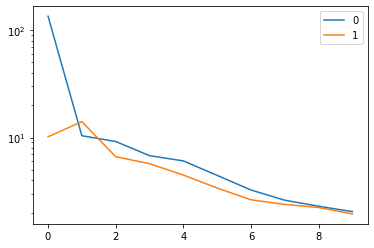

learning time: 0:00:59.236697


In [4]:
opt_params = {'lr': 0.001}
model_params = {'D_in': 29*29+29+14, 
                'H': 1024, 
                'D_out': 1, 
                'model_name': 'funnel'}
ds_params = {'n': 133885, 
             'features': ['coulomb','mulliken','A','B','C','alpha','homo',
                          'lumo','gap','r2','zpve','H','U0','U','G','Cv'], 
             'target': 'mu',
             'dim': 29,
             'use_pickle': True}
crit_params = {'reduction': 'sum'}

Learn(Dataset=QM9, Model=FFNet, Sampler=Selector, Optimizer=Adam, Criterion=MSELoss,
      batch_size=512, epochs=10, model_params=model_params, ds_params=ds_params, 
      opt_params=opt_params, crit_params=crit_params, save_model=False, load_model=False)

<class 'quantum_dataset.Champs'> dataset created...
epoch: 0 of 10, train loss: 4.101525259064533, val loss: 4.066231765782046
epoch: 1 of 10, train loss: 3.8723546507653226, val loss: 3.895892983835309
epoch: 2 of 10, train loss: 3.823414958565772, val loss: 3.833654670085767
epoch: 3 of 10, train loss: 3.8102448843255763, val loss: 3.827560891440562
epoch: 4 of 10, train loss: 3.8033942177520474, val loss: 3.8040062069601417
epoch: 5 of 10, train loss: 3.7976127467507204, val loss: 3.780215227516473
epoch: 6 of 10, train loss: 3.794130806405776, val loss: 3.812066257728633
epoch: 7 of 10, train loss: 3.791352393630661, val loss: 3.8116095509097745
epoch: 8 of 10, train loss: 3.788213594459474, val loss: 3.763457855268912
epoch: 9 of 10, train loss: 3.7866898814118892, val loss: 3.785124123533664
test loss: 3.778722193899459
y_pred:
tensor([[117.9031],
        [-10.0135],
        [  2.9628],
        [ -0.8577],
        [ -0.6408],
        [  0.9018],
        [  0.6580],
        [ -2.0

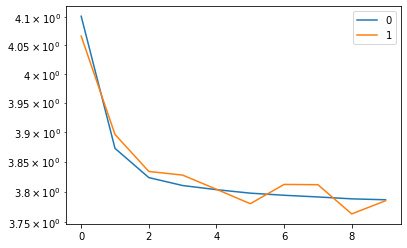

learning time: 0:12:05.865921


In [5]:
opt_params = {'lr': 0.001}
model_params = {'D_in': 128+32+64+32+64, 
                'H': 2048, 
                'D_out': 1, 
                'model_name': 'funnel'}
ds_params = {'n': 4658146, 
             'features': False,
             'use_h5': False,  
             'infer': False}
crit_params = {'reduction': 'sum'}
sample_params = {'split': .1, 'subset': False}

Learn(Dataset=Champs, Model=FFNet, Sampler=ChampSelector, Optimizer=Adam, Criterion=L1Loss,
      batch_size=1024, epochs=10, model_params=model_params, ds_params=ds_params, 
      sample_params=sample_params, opt_params=opt_params, crit_params=crit_params, 
      save_model=True, load_model=False)

In [6]:
model_params = {'D_in': 128+32+64+32+64, 
                'H': 2048, 
                'D_out': 1, 
                'model_name': 'funnel'}
ds_params = {'features': False,
             'use_h5': False,  
             'infer': True}

Learn(Dataset=Champs, Model=FFNet, Sampler=Selector, batch_size=2048, model_params=model_params, 
      ds_params=ds_params, load_model='./models/20201021_2101.pth', adapt=False)

<class 'quantum_dataset.Champs'> dataset created...
model loaded from state_dict...
self.predictions.iloc[:10] (2505542, 2)         id  scalar_coupling_constant
0  6664493                 68.821266
1  7046808                  2.313120
2  5534756                  1.849164
3  5372674                 -6.499192
4  7001340                  4.385532
5  5268943                  2.767892
6  6988115                 74.251808
7  6351010                 42.617397
8  5615108                 91.816177
9  6985700                 -1.110553
inference complete and saved to csv...
learning time: 0:00:26.784952
